## TensorFlow Model Creation

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
current = current = os.getcwd()
parent = parent_dir = os.path.dirname(current)
df = pd.read_csv(parent_dir+"/data/joint_data_collection_8targets.csv")
print(f"Dataset Shape: {df.shape}")
print(f"Spalten: {df.columns.tolist()}")

Dataset Shape: (17400, 25)
Spalten: ['Unnamed: 0', 'Engine type_In-line four, four-stroke', 'Engine type_In-line three, four-stroke', 'Engine type_Single cylinder, four-stroke', 'Engine type_Single cylinder, two-stroke', 'Engine type_Twin, four-stroke', 'Engine type_Twin, two-stroke', 'Engine type_Two cylinder boxer, four-stroke', 'Engine type_V2, four-stroke', 'Engine type_V4, four-stroke', 'Transmission type,final drive_Belt', 'Transmission type,final drive_Chain', 'Transmission type,final drive_Shaft drive (cardan)', 'Front brakes_Double disc', 'Front brakes_Dual disc', 'Front brakes_Expanding brake', 'Front brakes_Expanding brake (drum brake)', 'Front brakes_Single disc', 'Rear brakes_Expanding brake', 'Rear brakes_Expanding brake (drum brake)', 'Rear brakes_Single disc', 'Displacement ccm', 'Fuel capacity liters', 'Power HP', 'Category']


In [3]:
target_column = 'Category'  # <-- HIER ANPASSEN!

# Features (alle numerischen Spalten) und Target (Text) trennen
X = df.drop(target_column, axis=1).values
y_text = df[target_column].values

print(f"\nFeatures Shape: {X.shape}")
print(f"Target (Text) Shape: {y_text.shape}")
print(f"Unique Target Values: {len(np.unique(y_text))}")
print(f"Target Klassen: {np.unique(y_text)}")

# Text-Target zu numerischen Labels konvertieren
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_text)

print(f"\nEncoded Target Shape: {y.shape}")
print(f"Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {i}: {label}")

num_classes = len(label_encoder.classes_)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")



Features Shape: (17400, 24)
Target (Text) Shape: (17400,)
Unique Target Values: 8
Target Klassen: ['Classic' 'Cross / motocross' 'Naked bike' 'Scooter' 'Sport'
 'Super motard' 'Touring' 'Unspecified category']

Encoded Target Shape: (17400,)
Label Mapping:
  0: Classic
  1: Cross / motocross
  2: Naked bike
  3: Scooter
  4: Sport
  5: Super motard
  6: Touring
  7: Unspecified category

Training Samples: 13920
Test Samples: 3480


In [4]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='softmax', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.Dropout(0.2),    
    
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
print("\n" + "="*60)
print("MODEL ARCHITEKTUR")
print("="*60)
model.summary()



MODEL ARCHITEKTUR


e:\AIBAS HA\Repo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811,016 (3.09 MB)

 Trainable params: 807,944 (3.08 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [5]:
def plotTrainingAndValidationPerformance(epochs, accuracy, val_accuracy, loss, val_loss):
    """
    This function creates and stores the (1) accuracy plot and (2) loss plot
    for training and validation performances and stores them as (a) png and (b) pdf file
    at the 'learningBase' of docker volume 'ai_system'.
    - loss: categorical_crossentropy
    Computes the crossentropy loss between the labels and predictions.
    This loss is the crossentropy metric class to be used when there are multiple label classes (2 or more). 
    Here it is assumed that labels are given as a `one_hot` representation. 
    For instance, when `labels` are [2, 0, 1], `y_true` = [[0, 0, 1], [1, 0, 0], [0, 1, 0]].
    remember: a lower validation loss indicates a better model.
    - accuracy: 
    This metric creates two local variables, `total` and `count` 
    that are used to compute the frequency with which `y_pred` matches `y_true`. 
    This frequency is ultimately returned as `binary accuracy`: an idempotent operation that simply divides `total` by `count`.
    remember: a higher validation accuracy indicates a better model.
    """
    
    # initialize figure
    plt.figure(figsize=(15, 15))
    
    # characterize accuracy plot
    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, label="Training Accuracy",  linewidth=0.5)
    plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=0.5)
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")
    
    # characterize loss plot
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, label="Training Loss", linewidth=0.5)
    plt.plot(epochs, val_loss, label="Validation Loss", linewidth=0.5)
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")
    
    # indicate performance by showing plot generated (having displays connected)
    #plt.show()
    
    # indicate performance by storing the plot as png and pdf file
    plt.savefig(current+'/nn_doc/TrainingPerformance.png')
    plt.savefig('TrainingPerformance.pdf')


TRAINING STARTED
Epoch 1/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1546 - loss: 2.0782 - val_accuracy: 0.1509 - val_loss: 2.0760
Epoch 2/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1606 - loss: 2.0738 - val_accuracy: 0.1509 - val_loss: 2.0718
Epoch 3/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1651 - loss: 2.0695 - val_accuracy: 0.1509 - val_loss: 2.0675
Epoch 4/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1778 - loss: 2.0650 - val_accuracy: 0.2213 - val_loss: 2.0630
Epoch 5/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1961 - loss: 2.0603 - val_accuracy: 0.2213 - val_loss: 2.0583
Epoch 6/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2131 - loss: 2.0552 - val_accuracy: 0.2213 - val_loss: 2.0532
Epoch 7/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2135 - loss: 2.0497 - val_accuracy: 0.2044 - val_loss: 2.0476
Epoch 8/4000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2233 - loss:

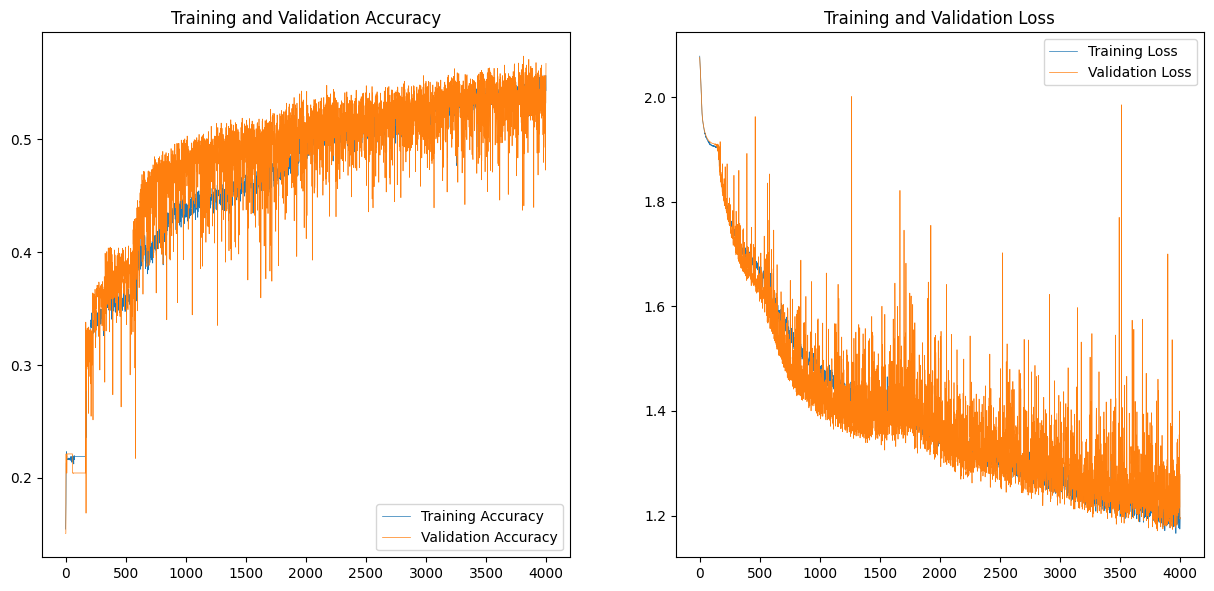

In [ ]:
epochen=4000
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=100,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.0001
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        min_delta=0.0001
    )
   
]

# Training starten
print(f"\n{'='*60}")
print(f"TRAINING STARTED")
print(f"{'='*60}")

start_time = datetime.now()

history = model.fit(
    X_train, y_train,
    epochs=epochen,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

#callbacks=callbacks,
end_time = datetime.now()
training_duration = (end_time - start_time).total_seconds()

# Training Metriken extrahieren
final_epoch = len(history.history['loss'])
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Best Epoch finden
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]

# Training Summary ausgeben
print(f"\n{'='*60}")
print(f"TRAINING SUMMARY")
print(f"{'='*60}")
print(f"Total Training Iterations (Epochs): {final_epoch}")
print(f"Training Duration: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")
print(f"\nFinal Epoch ({final_epoch}):")
print(f"  - Training Loss: {final_train_loss:.6f}")
print(f"  - Training Accuracy: {final_train_accuracy:.6f} ({final_train_accuracy*100:.2f}%)")
print(f"  - Validation Loss: {final_val_loss:.6f}")
print(f"  - Validation Accuracy: {final_val_accuracy:.6f} ({final_val_accuracy*100:.2f}%)")
print(f"\nBest Epoch ({best_epoch}):")
print(f"  - Validation Loss: {best_val_loss:.6f}")
print(f"  - Validation Accuracy: {best_val_accuracy:.6f} ({best_val_accuracy*100:.2f}%)")

# Test Set Evaluation
print(f"\n{'='*60}")
print(f"TEST SET EVALUATION")
print(f"{'='*60}")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f} ({test_accuracy*100:.2f}%)")

# Predictions
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Zurück zu Text-Labels
y_test_text = label_encoder.inverse_transform(y_test)
y_pred_text = label_encoder.inverse_transform(y_pred)
plotTrainingAndValidationPerformance(range(epochen), history.history["accuracy"], history.history["val_accuracy"],history.history["loss"], history.history["val_loss"])

model_path=os.path.join(parent,"code/models/bestmodel8longcycle.h5")
model.save(model_path, save_format="h5")



    


CLASSIFICATION REPORT
                      precision    recall  f1-score   support

             Classic       0.52      0.70      0.59       598
   Cross / motocross       0.46      0.61      0.52       383
          Naked bike       0.47      0.51      0.49       752
             Scooter       0.92      0.88      0.90       539
               Sport       0.52      0.55      0.53       758
        Super motard       0.59      0.07      0.12       143
             Touring       0.73      0.09      0.16       184
Unspecified category       0.00      0.00      0.00       123

            accuracy                           0.56      3480
           macro avg       0.52      0.42      0.41      3480
        weighted avg       0.56      0.56      0.53      3480

e:\AIBAS HA\Repo
Classification Report gespeichert als: e:\AIBAS HA\Repo\code/nn_doc/NN_classification_report.txt


e:\AIBAS HA\Repo\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\AIBAS HA\Repo\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\AIBAS HA\Repo\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


✓ Confusion Matrix gespeichert: e:\AIBAS HA\Repocode/nn_doc/confusion_matrix.png


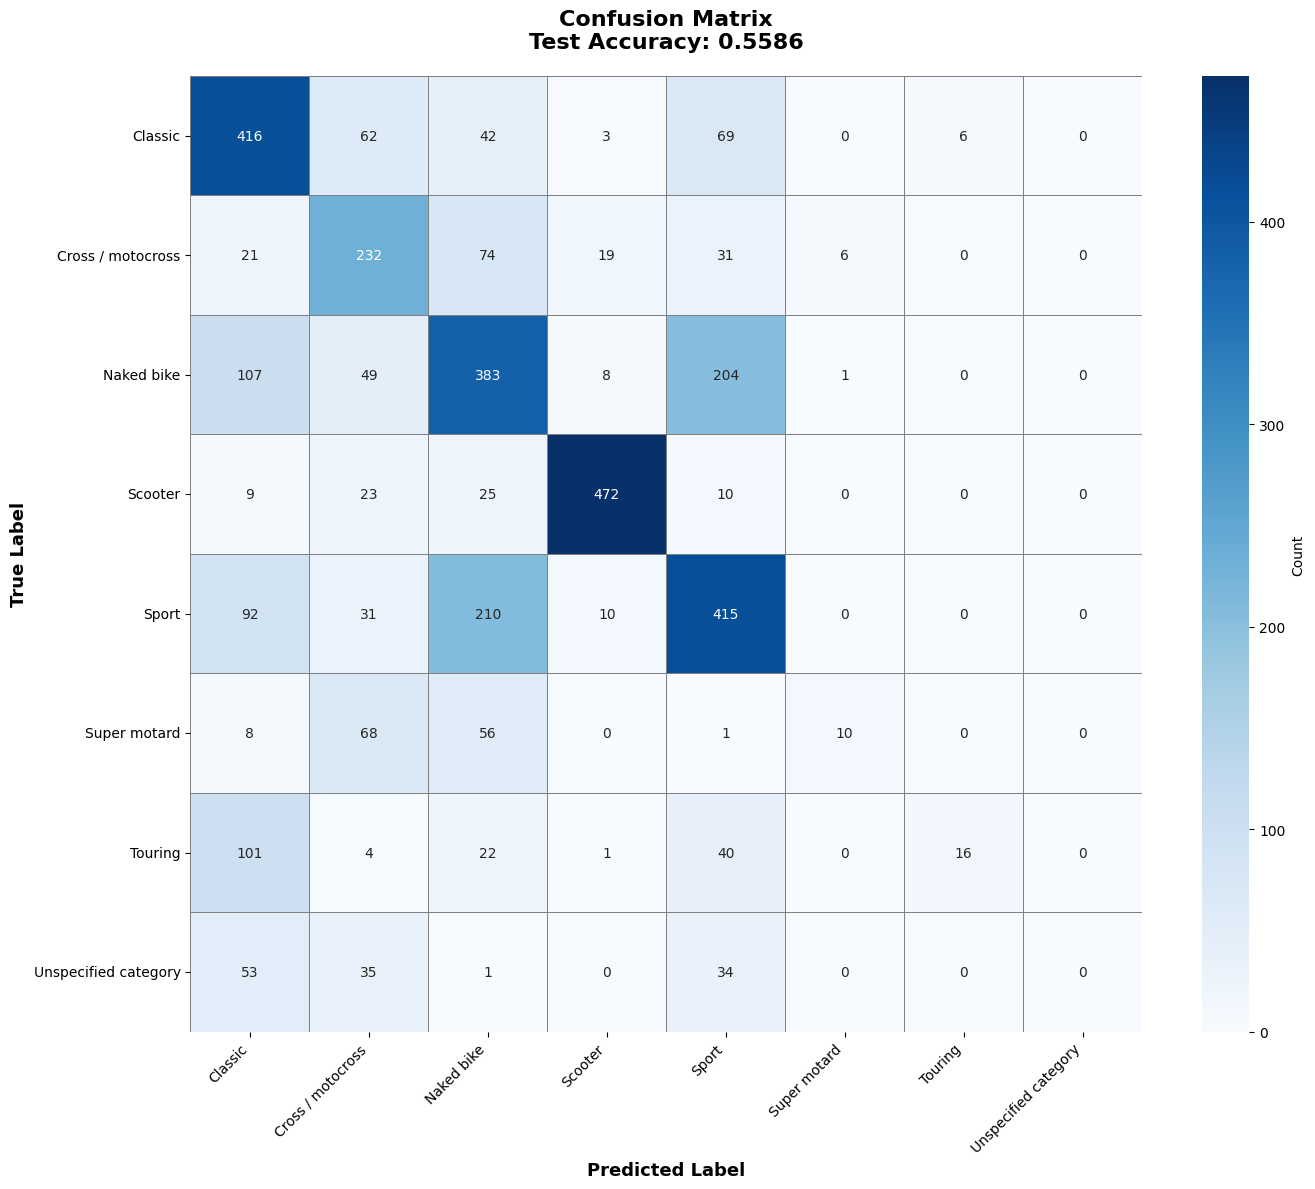

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
cr=classification_report(y_test_text, y_pred_text)
print(cr)
current = current = os.getcwd()
parent = parent_dir = os.path.dirname(current)
print(parent)
report_path=os.path.join(parent, "code/nn_doc/NN_classification_report.txt")
with open(report_path, 'w') as f:
    f.write("CLASSIFICATION REPORT\n")
    f.write("="*60 + "\n\n")
    f.write("\n")
    f.write(cr)
    f.write(f"\n\nTest Accuracy: {test_accuracy:.3f}\n")
print(f"Classification Report gespeichert als: {report_path}")
cm = confusion_matrix(y_test_text, y_pred_text)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='gray')
plt.title(f'Confusion Matrix\nTest Accuracy: {test_accuracy:.4f}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plot2_path = os.path.join(parent+'code/nn_doc/confusion_matrix.png')
plt.savefig(parent+'/code/nn_doc/confusion_matrix.png', dpi=300, bbox_inches='tight')
print(f"✓ Confusion Matrix gespeichert: {plot2_path}")
plt.show()

